# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
#NB: Kaggle requires phone verification to use the internet or a GPU. If you haven't done that yet, the cell below will fail
#    This code is only here to check that your internet is enabled. It doesn't do anything else.
#    Here's a help thread on getting your phone number verified: https://www.kaggle.com/product-feedback/135367

import socket,warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(('1.1.1.1', 53))
except socket.error as ex: raise Exception("STOP: No internet. Click '>|' in top right and set 'Internet' switch to on")

In [2]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

In [3]:
!pip install -Uqq fastai duckduckgo_search

In [4]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [5]:
L(ddg_images('printer', max_results=10)).itemgot('thumbnail')

(#10) ['https://tse4.mm.bing.net/th?id=OIP.Gc2HzzedhiPmW63d_s06nAHaEA&pid=Api','https://tse4.mm.bing.net/th?id=OIP.Mwt4TgfDk1XH3RnO4BDVaQHaHa&pid=Api','https://tse4.mm.bing.net/th?id=OIP.stIuDmg3oEP9BkLK8wVGxwHaFL&pid=Api','https://tse2.mm.bing.net/th?id=OIP.hl_XkhaK3d2-GfIwXZEz0wHaHe&pid=Api','https://tse1.mm.bing.net/th?id=OIP.4KCA9U1CHgV-prF6_bn8fwHaFh&pid=Api','https://tse3.mm.bing.net/th?id=OIP.ZqMXd8jUm8rrkE6fq_RM3QEsDE&pid=Api','https://tse1.mm.bing.net/th?id=OIP.XQkqlPynOB6V9T9ZOJEGEAHaHa&pid=Api','https://tse2.mm.bing.net/th?id=OIP.1pZDFmCOSjnldXj_bPvA5wHaHa&pid=Api','https://tse1.mm.bing.net/th?id=OIP.58_6NNu4pTaWSnLq3v3djAHaHa&pid=Api','https://tse4.mm.bing.net/th?id=OIP._CYFSw_dp8LOozRXWZGsSgHaFG&pid=Api']

In [6]:
#NB: `search_images` depends on duckduckgo.com, which doesn't always return correct responses.
#    If you get a JSON error, just try running it again (it may take a couple of tries).
urls = search_images('pencil photo', max_images=1)
urls[0]

Searching for 'pencil photo'


'http://www.baseballbytheyard.com/wp-content/uploads/2013/10/Pencil-1919217.jpg'

In [7]:
L(ddg_images('pen photo', max_results = 1)).itemgot('image')

(#1) ['https://i5.walmartimages.com/asr/aed8e157-f19c-43be-9411-26010bc936f5.0e9d61f88cc72ed72c6d8da678f27b43.jpeg']

In [8]:
L(ddg_images('pencil photo', max_results = 1)).itemgot('image')

(#1) ['http://www.baseballbytheyard.com/wp-content/uploads/2013/10/Pencil-1919217.jpg']

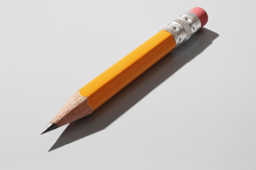

In [9]:
from fastdownload import download_url
dest = 'pencil.jpg'
download_url(urls[0], dest, show_progress=True)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [10]:
searches = 'pencil','pen'
path = Path('pencil_or_pen')
from time import sleep

for o in searches:
    dest = (path/o)
    print(dest)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    sleep(10)  # Pause between searches to avoid over-loading server
    resize_images(path/o, max_size=400, dest=path/o)

pencil_or_pen/pencil
Searching for 'pencil photo'
pencil_or_pen/pen
Searching for 'pen photo'


In [11]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

In [12]:
path

Path('pencil_or_pen')

In [13]:
get_image_files('/kaggle/working/pencil_or_pen/pencil')

(#26) [Path('/kaggle/working/pencil_or_pen/pencil/74cbd265-5564-4eac-9311-d5a5bb9fa22f.jpg'),Path('/kaggle/working/pencil_or_pen/pencil/26d186db-ec78-4df4-9ee7-c9cdbe688247.jpg'),Path('/kaggle/working/pencil_or_pen/pencil/197ee1b7-227e-4125-bce9-838754861ee5.jpg'),Path('/kaggle/working/pencil_or_pen/pencil/54122049-ce28-408e-8440-8b5dc57c2869.jpg'),Path('/kaggle/working/pencil_or_pen/pencil/49e42b8d-b958-4f7a-9931-0eb7a3104217.jpeg'),Path('/kaggle/working/pencil_or_pen/pencil/1fb55775-aca3-4083-92b9-ec94f545009e.jpeg'),Path('/kaggle/working/pencil_or_pen/pencil/0c830200-aa11-48c4-a2c7-962b9cef198d.jpg'),Path('/kaggle/working/pencil_or_pen/pencil/311d5f93-cb0d-4ae1-87ac-7a6a13840932.jpg'),Path('/kaggle/working/pencil_or_pen/pencil/19b1a8d7-f790-4f51-9160-5bf6bdb58731.jpg'),Path('/kaggle/working/pencil_or_pen/pencil/a8227ec9-ac96-4745-b511-407832cb1723.jpg')...]

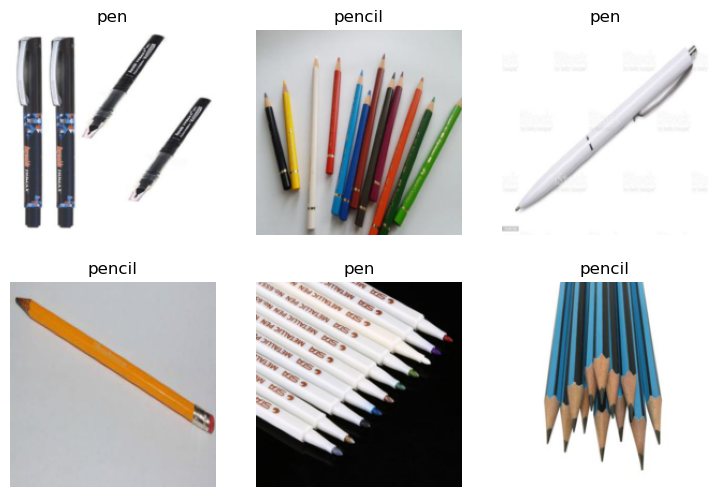

In [14]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

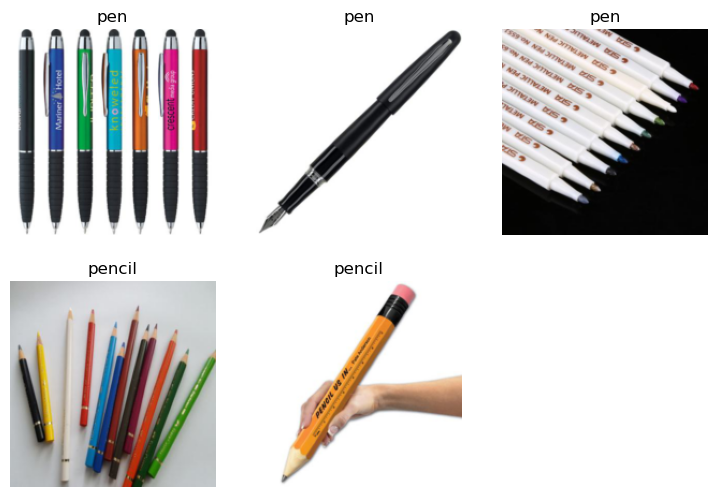

In [15]:
dls.show_batch(max_n=5)

In [16]:
learn_pen_or_pencil = vision_learner(dls, resnet18, metrics=error_rate)
learn_pen_or_pencil.fine_tune(3)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,0.998388,4.364161,0.454545,00:04


epoch,train_loss,valid_loss,error_rate,time
0,0.770254,2.948924,0.454545,00:00
1,0.963809,1.195501,0.363636,00:00
2,0.726443,0.546975,0.363636,00:00


In [17]:
learn_pen_or_pencil.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.079881,0.410978,0.272727,00:00


epoch,train_loss,valid_loss,error_rate,time
0,0.146597,0.267974,0.181818,00:00
1,0.105532,0.232277,0.090909,00:00
2,0.097250,0.220975,0.090909,00:00
3,0.089212,0.182853,0.090909,00:00
4,0.084280,0.153287,0.090909,00:01


In [18]:
is_bird,_,probs = learn_pen_or_pencil.predict('pencil.jpg')
print(f"This is a: {is_bird}.")
print(f"Probability it's a pen: {probs[0]:.4f}")

This is a: pencil.
Probability it's a pen: 0.0287


In [19]:
dest

Path('pencil_or_pen/pen')

In [20]:
download_url(search_images('fancy pencil', max_images=1)[0], Path('pencil_or_pen'), show_progress=True)

Searching for 'fancy pencil'


Path('pencil_or_pen/HTB1OCTAXwmH3KVjSZKzq6z2OXXaz.jpg')

In [21]:
is_bird,_,probs = learn_pen_or_pencil.predict('pencil_or_pen/HTB1OCTAXwmH3KVjSZKzq6z2OXXaz.jpg')
print(f"This is a: {is_bird}.")
print(f"Probability it's a pen: {probs[0]:.6f}")

This is a: pen.
Probability it's a pen: 0.977785


In [22]:
learn_pen_or_pencil.export('pencil.pkl')